<a href="https://colab.research.google.com/github/UmeshGayashan/EC7212-Take-Home-Assignment-2/blob/main/Task2_TakeHomeAssingment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

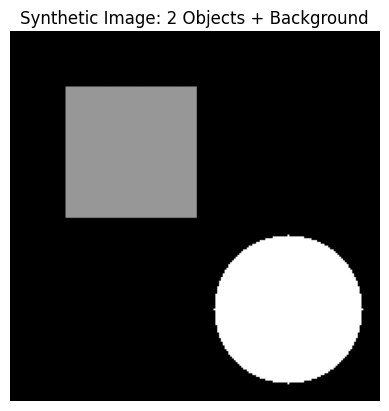

In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Create a black background
# 200x200 pixel image with all pixels set to 0 (black)
# dtype=np.uint8 means pixel values range 0 to 255
img = np.zeros((200, 200), dtype=np.uint8)

# Add a gray square (intensity 127)
# -1 means the rectangle is filled (not just the border)
cv2.rectangle(img, (30, 30), (100, 100), 127, -1)

# Add a white circle (intensity 240)
# (150, 150) - center, 40 - radius
cv2.circle(img, (150, 150), 40, 215, -1)

# Show the Image
plt.imshow(img, cmap='gray')
plt.title("Synthetic Image: 2 Objects + Background")
plt.axis('off')
plt.show()

In [15]:
# Region growing function
def region_growing(image, seed, threshold=10):
    # Initialize variables
    height, width = image.shape
    visited = np.zeros((height, width), dtype=bool)
    mask = np.zeros((height, width), dtype=np.uint8)
    seed_value = image[seed]

    # Directions for 8-connected neighbors
    directions = [(-1,-1), (-1,0), (-1,1),
                  (0,-1),           (0,1),
                  (1,-1),  (1,0),   (1,1)]

    # Start with seed point
    queue = [seed]
    visited[seed] = True

    while queue:
        y, x = queue.pop(0)

        # Check intensity similarity
        if abs(int(image[y,x]) - int(seed_value)) <= threshold:
            mask[y,x] = 255  # Mark as foreground

            # Check all 8 neighbors
            for dy, dx in directions:
                ny, nx = y + dy, x + dx

                # Check if neighbor is within image and not visited
                if (0 <= ny < height and 0 <= nx < width and not visited[ny,nx]):
                    visited[ny,nx] = True
                    queue.append((ny,nx))

    return mask

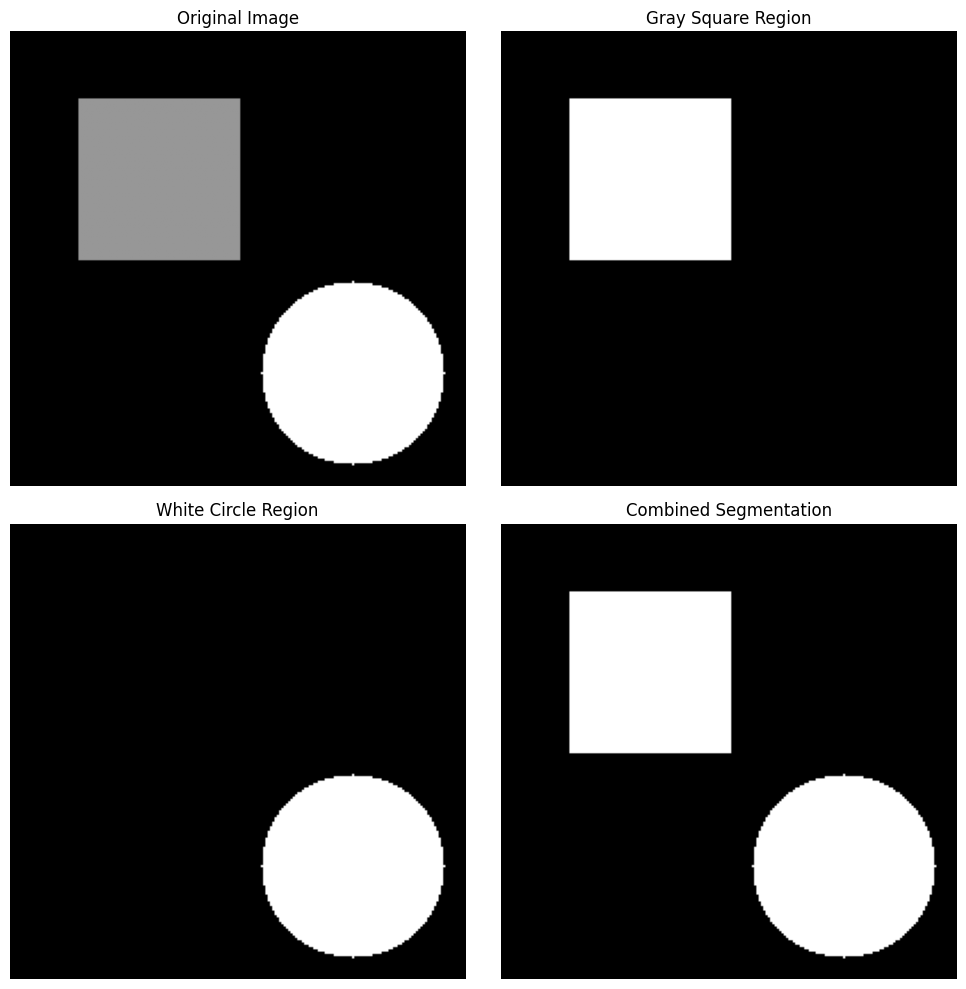

In [17]:
# Seed points (inside objects)
square_seed = (50, 50)    # Inside gray square
circle_seed = (150, 150)  # Center of white circle

# Apply region growing
square_mask = region_growing(img, square_seed, threshold=20)
circle_mask = region_growing(img, circle_seed, threshold=20)

# Combine results
combined_mask = cv2.bitwise_or(square_mask, circle_mask)

# Display results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Original image
ax[0,0].imshow(img, cmap='gray')
ax[0,0].set_title("Original Image")
ax[0,0].axis('off')

# Square segmentation
ax[0,1].imshow(square_mask, cmap='gray')
ax[0,1].set_title("Gray Square Region")
ax[0,1].axis('off')

# Circle segmentation
ax[1,0].imshow(circle_mask, cmap='gray')
ax[1,0].set_title("White Circle Region")
ax[1,0].axis('off')

# Combined segmentation
ax[1,1].imshow(combined_mask, cmap='gray')
ax[1,1].set_title("Combined Segmentation")
ax[1,1].axis('off')

plt.tight_layout()
plt.show()